In [ ]:
##Classification Tree, Bagging, Random Forests
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [45]:
from sklearn import preprocessing
#split dataset in features and target variable
feature_cols = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'Ethnicity_African']
X = pd.DataFrame(df, columns=feature_cols)
#X = pd.get_dummies(df[feature_cols]) # Features
y = df.term_deposit # Target variable

In [46]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

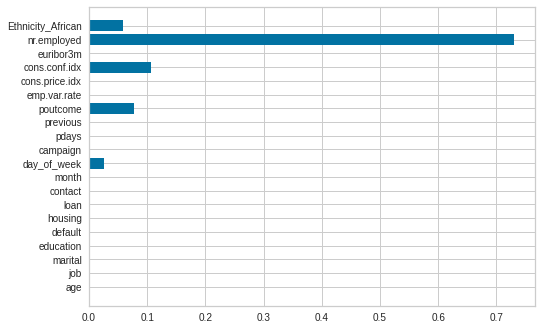

In [47]:
import numpy as np
from matplotlib import pyplot as plt

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#plot feature importance 
plt.barh(X_train.columns, clf.feature_importances_)

#Predict the response for test dataset
y_pred = clf.predict(X_test)






              precision    recall  f1-score   support

       unsub     0.9037    0.9877    0.9438     10437
         sub     0.7071    0.2195    0.3350      1408

    accuracy                         0.8964     11845
   macro avg     0.8054    0.6036    0.6394     11845
weighted avg     0.8803    0.8964    0.8715     11845

Precision: 0.707
Recall/TPR: 0.219
F1 Score: 0.335
Accuracy: 0.8964119881806669
FPR: 0.011


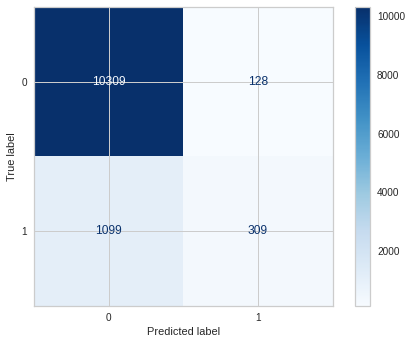

In [48]:
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

print(classification_report(y_test, y_pred, target_names=["unsub", "sub"], digits = 4))
precision = precision_score(y_test, y_pred, average = 'binary')
print('Precision: %.3f' % precision)
recall = recall_score(y_test, y_pred, average = 'binary')
print('Recall/TPR: %.3f' % recall)
f1 = f1_score(y_test, y_pred, average = 'binary')
print('F1 Score: %.3f' % f1)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(list(y_test), list(y_pred), labels=[0, 1]).ravel()
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
tot = cm.sum()
fpr = fp/tot
print('FPR: %.3f' % fpr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                          display_labels=clf.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='')

plt.show()

              precision    recall  f1-score   support

       unsub     0.9137    0.9714    0.9417     10437
         sub     0.6016    0.3196    0.4174      1408

    accuracy                         0.8940     11845
   macro avg     0.7576    0.6455    0.6796     11845
weighted avg     0.8766    0.8940    0.8794     11845

Precision: 0.602
Recall/TPR: 0.320
F1 Score: 0.417
Accuracy: 0.8939636977627691
FPR: 0.025


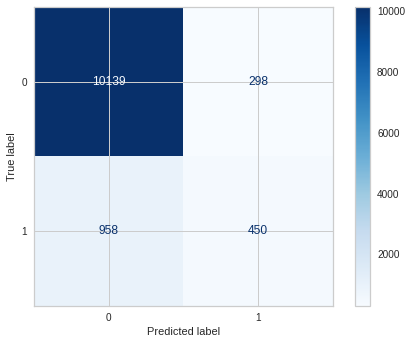

In [49]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


#Create a Gaussian Classifier
clf2=RandomForestClassifier(n_estimators=100)

#Train the model using the training
clf2.fit(X_train,y_train)

y_pred=clf2.predict(X_test)

# Model Accuracy
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["unsub", "sub"], digits = 4))
from sklearn.metrics import ConfusionMatrixDisplay
precision = precision_score(y_test, y_pred, average = 'binary')
print('Precision: %.3f' % precision)
recall = recall_score(y_test, y_pred, average = 'binary')
print('Recall/TPR: %.3f' % recall)
f1 = f1_score(y_test, y_pred, average = 'binary')
print('F1 Score: %.3f' % f1)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(list(y_test), list(y_pred), labels=[0, 1]).ravel()
cm = confusion_matrix(y_test, y_pred, labels=clf2.classes_)
tot = cm.sum()
fpr = fp/tot
print('FPR: %.3f' % fpr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                          display_labels=clf2.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='')

plt.show()

Accuracy: 0.8929506120726045
              precision    recall  f1-score   support

       unsub     0.9147    0.9689    0.9410     10437
         sub     0.5886    0.3303    0.4231      1408

    accuracy                         0.8930     11845
   macro avg     0.7517    0.6496    0.6821     11845
weighted avg     0.8759    0.8930    0.8794     11845

Precision: 0.589
Recall/TPR: 0.330
F1 Score: 0.423
Accuracy: 0.8929506120726045
FPR: 0.027


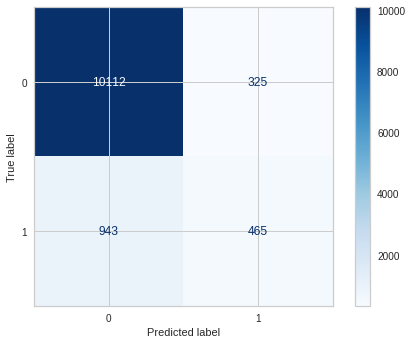

In [50]:
##Bagging Classifier Model

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


kfold = model_selection.KFold(n_splits=10)

cart = DecisionTreeClassifier()

num_trees = 100

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)

model.fit(X_train,y_train)

y_pred=model.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["unsub", "sub"], digits = 4))
from sklearn.metrics import ConfusionMatrixDisplay
precision = precision_score(y_test, y_pred, average = 'binary')
print('Precision: %.3f' % precision)
recall = recall_score(y_test, y_pred, average = 'binary')
print('Recall/TPR: %.3f' % recall)
f1 = f1_score(y_test, y_pred, average = 'binary')
print('F1 Score: %.3f' % f1)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(list(y_test), list(y_pred), labels=[0, 1]).ravel()
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
tot = cm.sum()
fpr = fp/tot
print('FPR: %.3f' % fpr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                          display_labels=model.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='')

plt.show()